#Modelo de agrupamiento: DB SCAN

##Lectura de datos y generación de dataframe

In [ ]:
#Importar la biblioteca pandas
import pandas as pd

#Especificar la ruta del archivo CSV
file_path = './data/data_ane.csv'

#Leer el archivo CSV y crear el dataframe
df = pd.read_csv(file_path, sep=',')

#Mostrar las primeras filas del dataframe para verificar que se haya leído correctamente
df.head()

,HEMATOCRITO,HEMOGLOBINA,GLOB_ROJOS,VOL_CORPUSCULAR_M,HGB_CORPUSCULAR_M,C_HGB_CORPUSCULAR_M,TARGET
0,48.2,14.9,5.17,93.1,28.9,31.0,0
1,49.8,16.2,5.42,91.9,30.0,32.6,0
2,46.3,14.7,4.63,100.0,31.8,31.7,1
3,49.0,15.8,5.36,91.4,29.4,32.2,0
4,43.9,14.0,4.79,91.7,29.2,31.8,0


##Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

##Estandarización de datos

In [ ]:
X = df.drop(columns='TARGET')

In [ ]:
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(X)


##Gráfica de distancia k-ésima

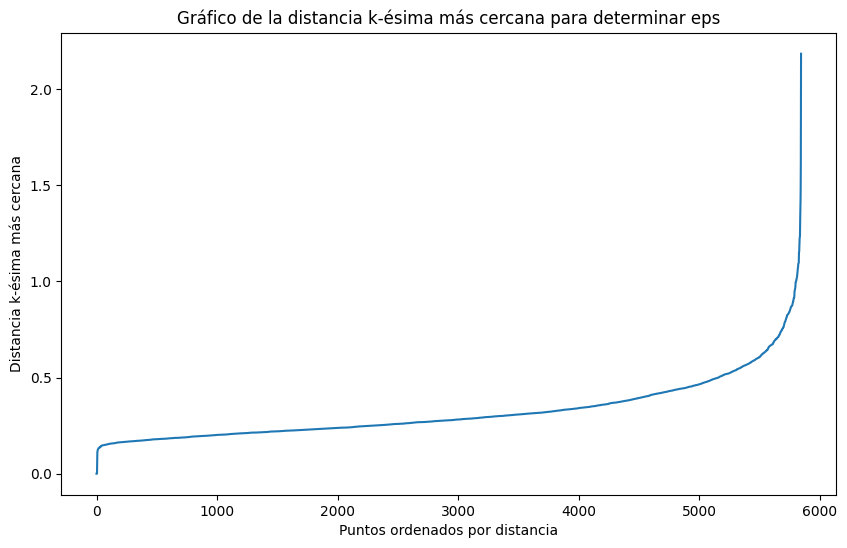

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Calcular las distancias de los k-vecinos más cercanos
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Ordenar las distancias
distances = np.sort(distances, axis=0)
distances = distances[:, 4]  # Seleccionar la columna k-ésima (en este caso k=5)

# Graficar las distancias
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel('Distancia k-ésima más cercana')
plt.title('Gráfico de la distancia k-ésima más cercana para determinar eps')
plt.show()


##Implementación del modelo

In [ ]:
# Inicializar el modelo DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)

# Ajustar el modelo y predecir los clústeres
y_dbscan = dbscan.fit_predict(X_scaled)

# Añadir los clústeres predichos al DataFrame original
df['Cluster'] = y_dbscan



##Visualización de clústers

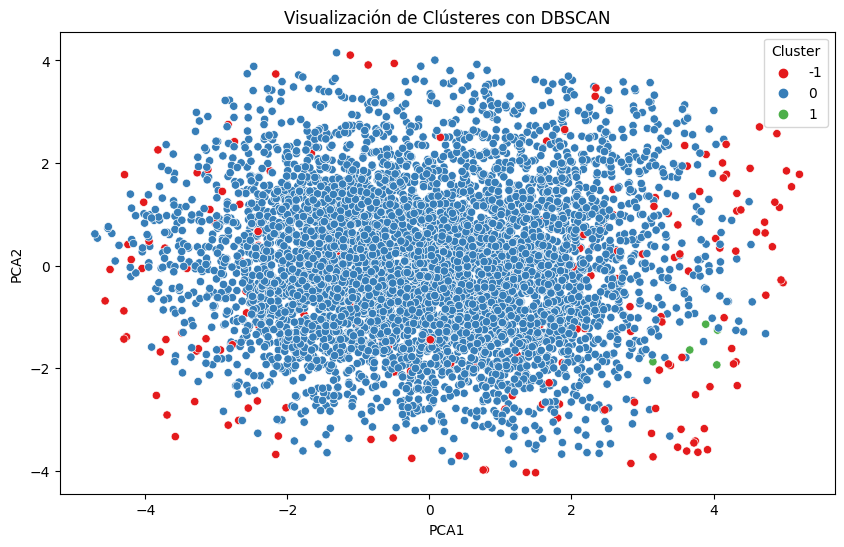

In [ ]:
# Reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales y los clústeres
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = y_dbscan

# Visualizar los clústeres
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set1', data=df_pca)
plt.title('Visualización de Clústeres con DBSCAN')
plt.show()

